In [ ]:
#Week 6


In [83]:
#Load gromacs by this line:
source /scratch/work/courses/CHEM-GA-2671-2023fa/software/gromacs-2019.6-plumedSept2020/bin/GMXRC.bash.modules

SyntaxError: invalid syntax (<ipython-input-83-bdba5905b96f>, line 2)

# Plumed Masterclass exercise 1
- Use numpy to read in the COLVAR files and matplotlib to plot the dihedrals.
- Use mdtraj to compute the phi and psi dihedrals from the output xtc file. 
- Plot them on top of the ones from the COLVAR file, making sure they agree! I suggest you plot phi vs psi with plt.scatter to get a ramachandran-like plot instead of looking vs time
- Compute the standard deviation of phi and the standard deviation of psi from the unbiased runs to give you an idea of the SIGMA values for metadynamics in the next step.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import glob
import os
import mdtraj as md
import statistics
from matplotlib.colors import LogNorm 

from matplotlib import cm

/home/axe1/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/axe1/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/axe1/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/axe1/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
#A
colvar_A = "/home/axe1/comp-lab-class/comp-lab-class-2023/Week6/A/COLVAR"

#B
colvar_B = "/home/axe1/comp-lab-class/comp-lab-class-2023/Week6/B/COLVAR"


time_A, phi_A, psi_A = np.loadtxt(colvar_A, unpack = True, comments = ['#','@'])
time_B, phi_B, psi_B = np.loadtxt(colvar_B, unpack = True, comments = ['#','@'])

#print(time_A, phi_A, psi_A)
print(phi_A)

[-1.257768 -2.714986 -2.332921 ... -2.558425 -2.40343  -2.678744]


In [3]:
#Use numpy to read in the COLVAR files and matplotlib to plot the dihedrals.

NameError: name 'fig' is not defined

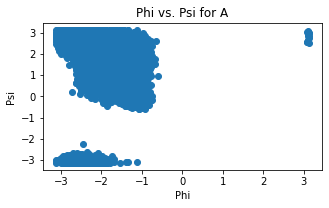

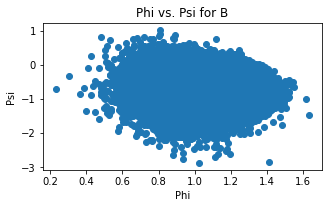

In [4]:
#A
figA = plt.figure(figsize=(5,3))
axA = figA.add_subplot(111)
figA.subplots_adjust(bottom=0.2)

#ax.scatter(x, y, c ="blue")
axA.scatter(phi_A, psi_A)
    
axA.set_xlabel("Phi")
axA.set_ylabel(r"Psi ")
plt.title("Phi vs. Psi for A")
    
#fig.savefig("/scratch/axe1/Rojas_Hocky/mscl/rgyr_colvar.png", dpi=300)


#B
figB = plt.figure(figsize=(5,3))
axB = figB.add_subplot(111)
figB.subplots_adjust(bottom=0.2)

#ax.scatter(x, y, c ="blue")
axB.scatter(phi_B, psi_B)
    
axB.set_xlabel("Phi")
axB.set_ylabel(r"Psi ")
plt.title("Phi vs. Psi for B")
    
fig.savefig("Figures/colvar.png", dpi=300)


In [5]:
#Use mdtraj to compute the phi and psi dihedrals from the output xtc file.

In [5]:
#for A

trajectory = md.load("/home/axe1/comp-lab-class/comp-lab-class-2023/Week6/A/traj_comp.xtc", top = "/home/axe1/comp-lab-class/comp-lab-class-2023/Week6/A/dialaA.pdb")
md_phi_A = md.compute_phi(trajectory)[1].flatten()
md_psi_A = md.compute_psi(trajectory)[1].flatten()

#for B

trajectory = md.load("/home/axe1/comp-lab-class/comp-lab-class-2023/Week6/B/traj_comp.xtc", top = "/home/axe1/comp-lab-class/comp-lab-class-2023/Week6/B/dialaB.pdb")
md_phi_B = md.compute_phi(trajectory)[1].flatten()
md_psi_B = md.compute_psi(trajectory)[1].flatten()


In [6]:
#Plot them on top of the ones from the COLVAR file, making sure they agree!

<ipython-input-6-f8303c63cf23>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axA2 = figA.add_subplot(111)


NameError: name 'md_phi_A' is not defined

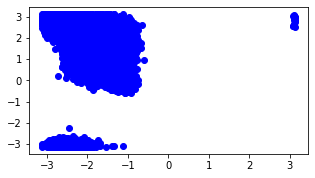

In [6]:
#A
figA = plt.figure(figsize=(5,3))
axA = figA.add_subplot(111)
axA2 = figA.add_subplot(111)
figA.subplots_adjust(bottom=0.2)

#ax.scatter(x, y, c ="blue")
axA.scatter(phi_A, psi_A, c = "blue", label = "Colvar dihedrals")
axA2.scatter(md_phi_A, md_psi_A, c = "green", label = "MDtraj dihedrals")
    
axA.set_xlabel("Phi")
axA.set_ylabel(r"Psi ")
plt.legend()
plt.title("Phi vs. Psi for A")

#B
figB = plt.figure(figsize=(5,3))
axB = figB.add_subplot(111)
axB2 = figB.add_subplot(111)
figB.subplots_adjust(bottom=0.2)

#ax.scatter(x, y, c ="blue")
axB.scatter(phi_B, psi_B, c = "blue", label = "Colvar dihedrals")
axB2.scatter(md_phi_B, md_psi_B, c = "green", label = "MDtraj dihedrals")
    
axB.set_xlabel("Phi")
axB.set_ylabel(r"Psi ")
plt.legend()
plt.title("Phi vs. Psi for B")

fig.savefig("Figures/COLVAR_MDtraj.png", dpi=300)

In [7]:
# Compute the standard deviation of phi and the standard deviation of psi from the unbiased runs to give you an idea of the SIGMA values for metadynamics in the next step.

In [8]:
#for A
m1 = statistics.mean(phi_A)
m2 = statistics.mean(psi_A)

SD_phi_A = statistics.stdev(phi_A, xbar = m1)
SD_psi_A = statistics.stdev(psi_A, xbar = m2)

print(SD_phi_A,SD_psi_A )
#for B
m3 = statistics.mean(phi_B)
m4 = statistics.mean(psi_B)

SD_phi_B = statistics.stdev(phi_B, xbar = m3)
SD_psi_B = statistics.stdev(psi_B, xbar = m4)
print(SD_phi_B,SD_psi_B )

0.5538343133969992 1.0249032442200507
0.1323824281422429 0.34453614703655894


In [9]:
pwd
cd 

NameError: name 'pwd' is not defined

Text(0.5, 1.0, 'Phi')

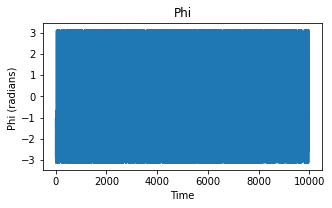

In [10]:
# visualize the behavior of the CV during the simulation, as reported in the COLVAR file:

colvar = "lugano-3/COLVAR"
time, phi, psi, metad_bias = np.loadtxt(colvar, unpack = True, comments = ['#','@'])

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)
    
ax.plot(time,phi)
    
ax.set_xlabel("Time")
ax.set_ylabel(r"Phi (radians) ")
plt.title("Phi")

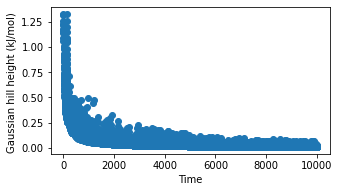

In [11]:
#HILLS file to visualize the decrease of the Gaussian height during the simulation, according to the well-tempered recipe:
hills = "lugano-3/HILLS"
time, phi, sigma_phi, height, biasf = np.loadtxt(hills, unpack = True, comments = ['#','@'])

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)
    
ax.scatter(time,height)
    
ax.set_xlabel("Time")
ax.set_ylabel(r"Gaussian hill height (kJ/mol) ")
fig.savefig("Figures/Gaussian_height.png", dpi=300)

In [12]:
#The grid file has the bias. Plot the negative of the energy column in the grid file, does it look like the FES? Is it slightly different? Perhaps scaled by a constant that you can figure out?

<ipython-input-14-d8a18d30c670>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(111)


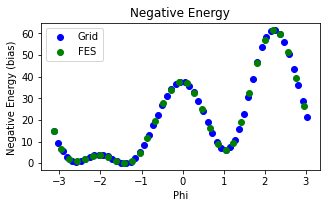

In [14]:
file = "lugano-3/phi.psi.bias.grid.dat"
fes = "lugano-3/fes.dat"

#phi metad.bias der_phi
phi, bias, der_phi = np.loadtxt(file, unpack = True, comments = ['#','@'])
phi_fes, free_fes, der_phi = np.loadtxt(fes, unpack = True, comments = ['#','@'])
#phi psi file.free der_phi der_psi

bias_grid = bias- max(bias)
free_fes = free_fes - min(free_fes)

bias_grid = bias/(-0.9) 
bias_grid = bias_grid - min(bias_grid)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)
    
ax.scatter(phi,bias_grid, color = "blue", label = "Grid")
ax2.scatter(phi_fes, free_fes, color = "green", label = "FES")
    
ax.set_xlabel("Phi")
ax.set_ylabel(r"Negative Energy (bias) ")
plt.title("Negative Energy")
plt.legend()

fig.savefig("Figures/Negative_Energy_grid_andFES.png", dpi=300)

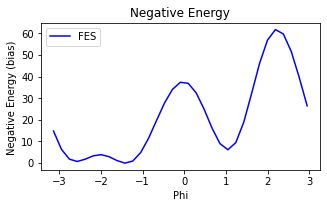

In [15]:
#Exercise 2: Estimating Free Energy
#Plot Phi (x-axis) vs. Free Energy (y-axis)
fes = "lugano-3/fes.dat"

phi_fes, bias_fes, der_phi_fes = np.loadtxt(fes, unpack = True, comments = ['#','@'])


bias_fes = bias_fes - min(bias_fes)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
#ax2 = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)
    
ax.plot(phi_fes,bias_fes, color = "blue", label = "FES")
    
ax.set_xlabel("Phi")
ax.set_ylabel(r"Negative Energy (bias) ")
plt.title("Negative Energy")
plt.legend()

fig.savefig("Figures/Negative_Energy_FES.png", dpi=300)

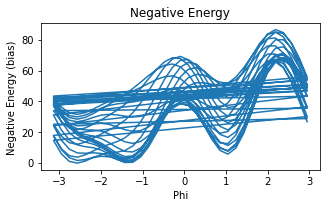

In [16]:
#2D metadynamics for phi and psi
#Run at least 10 ns and check convergence of the FES with sum_hills. Is your bias factor and height okay or do you need to change it? Or run longer?

fes = "lugano-3/2d_metad_phi_psi/fes.dat"

#phi psi file.free der_phi der_psi
phi, psi, file_free, der_phi, der_psi = np.loadtxt(fes, unpack = True, comments = ['#','@'])
#phi_fes, bias_fes, der_phi_fes = np.loadtxt(fes, unpack = True, comments = ['#','@'])

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
#ax2 = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)
    
file_free = file_free - min(file_free)
ax.plot(phi,file_free)
    
ax.set_xlabel("Phi")
ax.set_ylabel(r"Negative Energy (bias) ")
plt.title("Negative Energy")
#plt.legend()

fig.savefig("Figures/Negative_Energy_2d_FES.png", dpi=300)


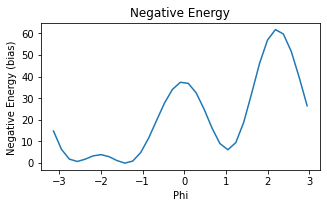

In [17]:
#2D metadynamics for phi and psi
#Run at least 10 ns and check convergence of the FES with sum_hills. Is your bias factor and height okay or do you need to change it? Or run longer?

fes = "lugano-3/fes.dat"

#time phi psi sigma_phi sigma_psi height biasf
#phi psi file.free der_phi der_psi
#time, phi, psi, sigma_phi, simga_psi, height, biasf = np.loadtxt(fes, unpack = True, comments = ['#','@'])
#phi file.free der_phi
phi_fes, file_free_fes, der_phi_fes = np.loadtxt(fes, unpack = True, comments = ['#','@'])

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
#ax2 = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)
    
file_free_fes = file_free_fes - min(file_free_fes)
ax.plot(phi_fes,file_free_fes)
    
ax.set_xlabel("Phi")
ax.set_ylabel(r"Negative Energy (bias) ")
plt.title("Negative Energy")
#plt.legend()

fig.savefig("Figures/Negative_Energy_2d_FES_1.png", dpi=300)


<ipython-input-18-738b5c4b4630>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2d_2 = fig_2d.add_subplot(111)


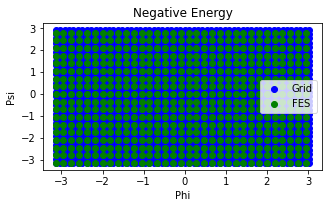

In [18]:
#Free energy surface with labeled axes and color bar. This time, add contour lines. This should look more like a surface than from replica exchange!
grid = "lugano-3/2d_metad_phi_psi/2dphi.psi.bias.grid.dat"
fes_2d = "lugano-3/2d_metad_phi_psi/fes.dat"


phi, psi, bias, der_phi, der_psi = np.loadtxt(grid, unpack = True, comments = ['#','@'])

phi_fes, psi_fes, free_fes, der_phi, der_psi = np.loadtxt(fes_2d, unpack = True, comments = ['#','@'])
#phi psi file.free der_phi der_psi


#bias_grid = bias- max(bias)
#free_fes = free_fes - min(free_fes)

#bias_grid = bias/(-0.9) 
#bias_grid = bias_grid - min(bias_grid)

fig_2d = plt.figure(figsize=(5,3))
ax2d_1 = fig_2d.add_subplot(111)
ax2d_2 = fig_2d.add_subplot(111)
fig_2d.subplots_adjust(bottom=0.2)
    
ax2d_1.scatter(phi,psi, color = "blue", label = "Grid")
ax2d_2.scatter(phi_fes, psi_fes, color = "green", label = "FES")
    
ax2d_1.set_xlabel("Phi")
ax2d_2.set_ylabel(r"Psi ")
plt.title("Negative Energy")
plt.legend()

#fig.savefig("Negative_Energy_grid_andFES.png", dpi=300)


<ipython-input-23-c91dbabc0c96>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2_2d = fig_2d.add_subplot(111)


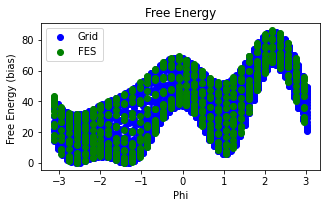

In [23]:
file_grid_2d = "lugano-3/2d_metad_phi_psi/2dphi.psi.bias.grid.dat"
#phi psi file.free der_phi der_psi
fes_2d = "lugano-3/2d_metad_phi_psi/fes.dat"

#phi psi metad.bias der_phi der_psi
phi_2d, psi_2d, bias_grid_2d, der_phi_2d, der_psi_2d = np.loadtxt(file_grid_2d, unpack = True, comments = ['#','@'])

phi_fes_2d, psi_fes_2d, file_free_2d, der_phi_fes_2d, der_psi_fes_2d = np.loadtxt(fes_2d, unpack = True, comments = ['#','@'])

bias_grid = bias_grid_2d- max(bias_grid_2d)
file_free_2d = file_free_2d - min(file_free_2d)

bias_grid_2d = bias_grid_2d/(-0.9) 
bias_grid_2d = bias_grid_2d - min(bias_grid_2d)

fig_2d = plt.figure(figsize=(5,3))
ax_2d = fig_2d.add_subplot(111)
ax2_2d = fig_2d.add_subplot(111)
fig_2d.subplots_adjust(bottom=0.2)
    
ax_2d.scatter(phi_2d,bias_grid_2d, color = "blue", label = "Grid")
ax2_2d.scatter(phi_fes_2d, file_free_2d, color = "green", label = "FES")
    
ax_2d.set_xlabel("Phi")
ax_2d.set_ylabel(r"Free Energy (bias) ")
plt.title("Free Energy")
plt.legend()

fig_2d.savefig("Free_Energy_grid_andFES_2d.png", dpi=300)

<ipython-input-52-7d8f50c77b7d>:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(-np.log(H), extent=[x[0], x[-1], y[0], y[-1]], aspect = 'auto', origin = 'lower', interpolation = 'nearest')


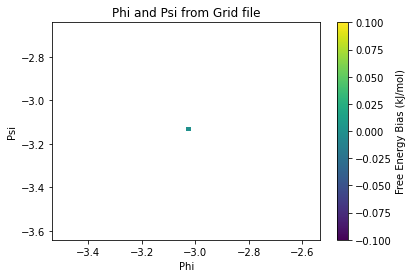

In [52]:
###DOES NOT WORK


file_grid_2d = "lugano-3/2d_metad_phi_psi/2dphi.psi.bias.grid"
#phi psi metad.bias der_phi der_psi
phi_2d, psi_2d, bias_grid_2d, der_phi_2d, der_psi_2d = np.loadtxt(file_grid_2d, unpack = True, comments = ['#','@'])

H, x, y = np.histogram2d(phi_2d[1].flatten(), psi_2d[1].flatten(), bins = 50)
#H, x,y = np.histogram2d(der_phi_2d[1].flatten(), der_psi_2d[1].flatten(), bins = 50)
plt.imshow(-np.log(H), extent=[x[0], x[-1], y[0], y[-1]], aspect = 'auto', origin = 'lower', interpolation = 'nearest')
plt.colorbar(label="Free Energy Bias (kJ/mol)")
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.title("Phi and Psi from Grid file")
plt.savefig("Figures/2d_phi_psi_fes.png", dpi=300)
plt.show()

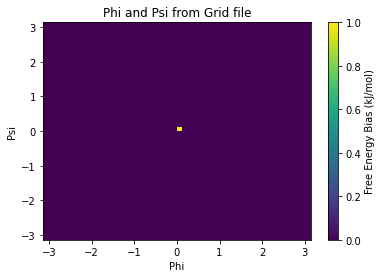

In [34]:
###DOES NOT WORK

fes_2d = "lugano-3/2d_metad_phi_psi/fes.dat"
#phi psi metad.bias der_phi der_psi

phi_fes, psi_fes, free_fes, der_phi, der_psi = np.loadtxt(fes_2d, unpack = True, comments = ['#','@'])
#phi psi file.free der_phi der_psi
#phi_2d, psi_2d, bias_grid_2d, der_phi_2d, der_psi_2d = np.loadtxt(file_grid_2d, unpack = True, comments = ['#','@'])

H, x, y = np.histogram2d(phi_fes[1].flatten(), psi_fes[1].flatten(), bins = 50)
#H, x,y = np.histogram2d(der_phi[1].flatten(), der_psi[1].flatten(), bins = 50)

#H, x, y = np.array(phi_fes,psi_fes)

plt.imshow(H, extent=[-3.14, 3.14, -3.14, 3.14], aspect = 'auto', origin = 'lower', interpolation = 'nearest')
plt.colorbar(label="Free Energy Bias (kJ/mol)")
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.title("Phi and Psi from Grid file")
plt.savefig("Figures/2d_phi_psi_fes.png", dpi=300)
plt.show()

<ipython-input-48-19536a943d7e>:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(-np.log(H), extent=[x[0], x[-1], y[0], y[-1]], aspect = 'auto', origin = 'lower', interpolation = 'nearest')


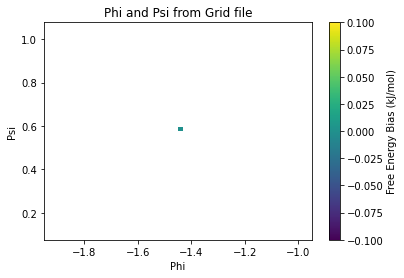

In [48]:
###ATTEMPT #3?

trajectory = md.load("/home/axe1/comp-lab-class/comp-lab-class-2023/Week6/lugano-3/2d_metad_phi_psi/traj_comp.xtc", top = "/home/axe1/comp-lab-class/comp-lab-class-2023/Week6/A/dialaA.pdb")
md_phi_A_2d = md.compute_phi(trajectory)[1].flatten()
md_psi_A_2d = md.compute_psi(trajectory)[1].flatten()

H, x, y = np.histogram2d(md_phi_A_2d[1].flatten(), md_psi_A_2d[1].flatten(), bins = 50)
plt.imshow(-np.log(H), extent=[x[0], x[-1], y[0], y[-1]], aspect = 'auto', origin = 'lower', interpolation = 'nearest')
plt.colorbar(label="Free Energy Bias (kJ/mol)")
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.title("Phi and Psi from Grid file")
plt.savefig("Figures/2d_phi_psi_mdtraj_fes.png", dpi=300)
plt.show()

In [ ]:
#grid file fields

phi psi metad.bias der_phi der_psi


#HILLS fields
time phi psi sigma_phi sigma_psi height biasf

<ipython-input-43-56fe715ee206>:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(-np.log(H), extent=[x[0], x[-1], y[0], y[-1]], aspect = 'auto', origin = 'lower', interpolation = 'nearest')


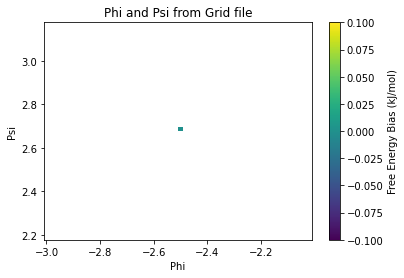

In [43]:
### DOES NOT WORK

file_grid_2d = "lugano-3/2d_metad_phi_psi/HILLS"
#phi psi metad.bias der_phi der_psi
#phi_2d, psi_2d, bias_grid_2d, der_phi_2d, der_psi_2d = np.loadtxt(file_grid_2d, unpack = True, comments = ['#','@'])
time, phi, psi, sigma_phi, sigma_psi, height, biasf = np.loadtxt(file_grid_2d, unpack = True, comments = ['#','@'])


H, x, y = np.histogram2d(phi[1].flatten(), psi[1].flatten(), bins = 50)
plt.imshow(-np.log(H), extent=[x[0], x[-1], y[0], y[-1]], aspect = 'auto', origin = 'lower', interpolation = 'nearest')
plt.colorbar(label="Free Energy Bias (kJ/mol)")
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.title("Phi and Psi from Grid file")
#plt.savefig("Figures/2d_phi_psi_fes.png", dpi=300)
plt.show()

In [5]:
### DOES NOT WORK


fes_2d = "lugano-3/2d_metad_phi_psi/fes.dat"
#phi psi metad.bias der_phi der_psi

phi_fes, psi_fes, free_fes, der_phi, der_psi = np.loadtxt(fes_2d, unpack = True, comments = ['#','@'])
#phi psi file.free der_phi der_psi
#phi_2d, psi_2d, bias_grid_2d, der_phi_2d, der_psi_2d = np.loadtxt(file_grid_2d, unpack = True, comments = ['#','@'])





array = np.array([[phi_fes,psi_fes],free_fes])
#print(array)

#H, x, y = np.histogram2d(phi_fes[1].flatten(), psi_fes[1].flatten(), bins = 50)
#H, x,y = np.histogram2d(der_phi[1].flatten(), der_psi[1].flatten(), bins = 50)
plt.imshow(array, extent=[-3.14, 3.14, -3.14, 3.14], aspect = 'auto', origin = 'lower', interpolation = 'nearest')
plt.colorbar(label="Free Energy Bias (kJ/mol)")
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.title("2D Phi and Psi")
plt.savefig("Figures/2d_phi_psi_fes.png", dpi=300)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [18]:
###DOES NOT WORK


# Initialize an empty list to store the data
data_array = []

# Open the file and read its contents
with open("lugano-3/2d_metad_phi_psi/fes.dat", 'r') as file:
    lines = file.readlines()

# Skip the lines that start with "#!"
lines = [line for line in lines if not line.startswith("#")]

# Process the remaining lines to create the data array
for line in lines:
    # Split each line into values and convert them to the desired data types
    values = line.split()
    if len(values) >= 3:
        phi = values[0]
        psi = values[1]
        energy = values[2]
    
    # Append the values to the data array
        data_array =np.empty((len(phi), len(psi)))
        data_array.append([[phi, psi], [energy]])
        #data_array[phi, psi]=energy


#H, x,y = np.histogram2d(der_phi[1].flatten(), der_psi[1].flatten(), bins = 50)
plt.imshow(data_array, extent=[-3.14, 3.14, -3.14, 3.14], aspect = 'auto', origin = 'lower', interpolation = 'nearest')
plt.colorbar(label="Free Energy Bias (kJ/mol)")
#plt.imshow(data_array, cmap = "viridis", origin = 'upper', interpolation = 'none')
plt.colorbar(label="Free Energy Bias (kJ/mol)")
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.title("2D Phi and Psi")
plt.savefig("Figures/2d_phi_psi_fes.png", dpi=300)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'append'

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 2) + inhomogeneous part.

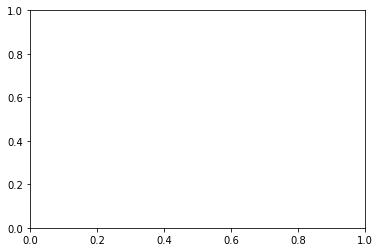

In [6]:
###DOES NOT WORK

fes_2d = "lugano-3/2d_metad_phi_psi/fes.dat"
#phi psi metad.bias der_phi der_psi

phi_fes, psi_fes, free_fes, der_phi, der_psi = np.loadtxt(fes_2d, unpack = True, comments = ['#','@'])
#phi psi metad.bias der_phi der_psi

#data_array = np.empty((len(phi_fes), len(psi_fes)))
data_array = []
data_array.append([[phi_fes, psi_fes], [free_fes]])

plt.imshow(data_array, extent=[-3.14, 3.14, -3.14, 3.14], aspect = 'auto', origin = 'lower', interpolation = 'nearest')
plt.colorbar(label="Free Energy Bias (kJ/mol)")
#plt.imshow(data_array, cmap = "viridis", origin = 'upper', interpolation = 'none')
plt.colorbar(label="Free Energy Bias (kJ/mol)")
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.title("2D Phi and Psi")
plt.savefig("Figures/2d_phi_psi_fes.png", dpi=300)
plt.show()

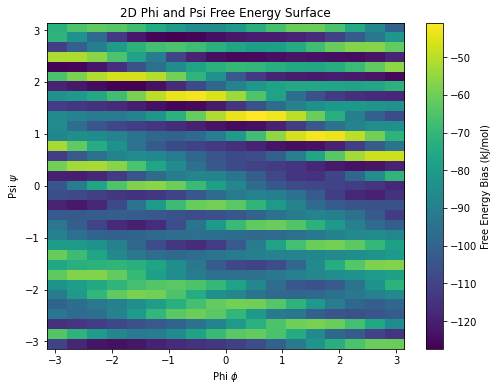

<Figure size 432x288 with 0 Axes>

In [6]:
fes_2d = "lugano-3/2d_metad_phi_psi/fes.dat"
#phi psi metad.bias der_phi der_psi

phi_fes, psi_fes, free_fes, der_phi, der_psi = np.loadtxt(fes_2d, unpack = True, comments = ['#','@'])

phi_fes = phi_fes.reshape((33,18))
psi_fes = psi_fes.reshape((33,18))
free_fes = free_fes.reshape((33,18))

plt.figure(figsize=(8, 6))
plt.imshow(free_fes, extent=[-np.pi, np.pi, -np.pi, np.pi], cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Free Energy Bias (kJ/mol)')
plt.xlabel('Phi $\phi$')
plt.ylabel('Psi $\psi$')
plt.title('2D Phi and Psi Free Energy Surface')

plt.show()

plt.savefig("Figures/2d_phi_psi_fes.png", dpi=300)